# **Importing Library**




In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# ***EDA***

In [6]:

df.shape



(7043, 21)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3196-NVXLZ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## **checking null value**

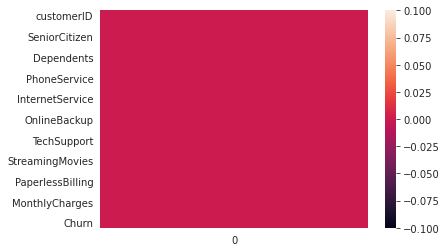

In [ ]:
sns.heatmap(df.isnull().sum().to_frame())

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## **Data Formatting**

In [ ]:
f_value=[]
for i in df['TotalCharges']:
  try:
    f_value.append(float(i))
  except:
    f_value.append(-1)

df['TotalCharges']=f_value

In [ ]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

## **Visualization**

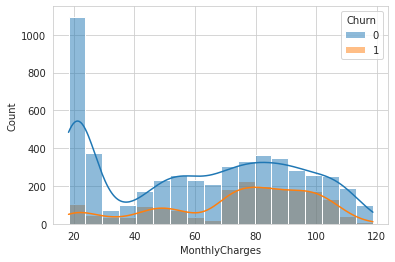

In [ ]:
sns.histplot(x='MonthlyCharges',data=df,kde=True,hue='Churn')

Higher the Monthly charge higher the churn rate is

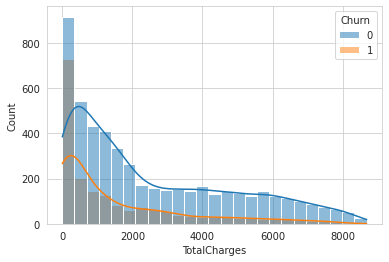

In [ ]:
sns.histplot(x='TotalCharges',data=df,kde=True,hue='Churn')

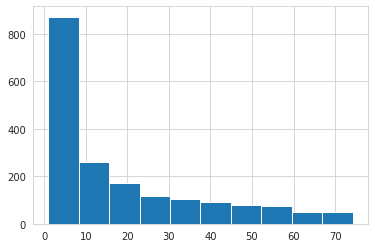

(array([803., 547., 478., 455., 391., 426., 467., 502., 780., 325.]),
 array([-5.07614213e-02,  7.88849194e+00,  1.58277453e+01,  2.37669987e+01,
         3.17062520e+01,  3.96455054e+01,  4.75847587e+01,  5.55240121e+01,
         6.34632654e+01,  7.14025188e+01,  7.93417722e+01]),
 <a list of 10 Patch objects>)

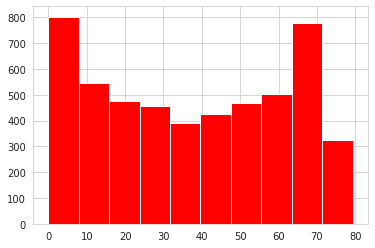

In [ ]:
temp_df=df.loc[df['Churn']==1]
plt.hist(temp_df['TotalCharges']/temp_df['MonthlyCharges'],stacked=True)
plt.show()
temp_df=df.loc[df['Churn']==0]
plt.hist(temp_df['TotalCharges']/temp_df['MonthlyCharges'],color='red',stacked=True)

High churn rate if monthly charge / total charge in b/w 1 to 10

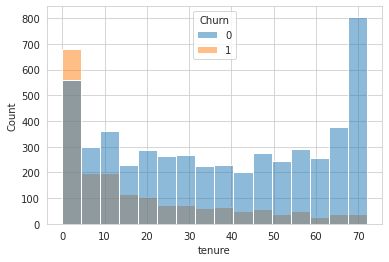

In [ ]:
sns.histplot(x='tenure',data=df,hue='Churn')

Lower the tenure higher the churn rate

In [ ]:
num=[]
cat=[]
count=df.nunique()
for i in df.columns:
  if count[i]>5:
    num.append(i)
  else:
    cat.append(i)


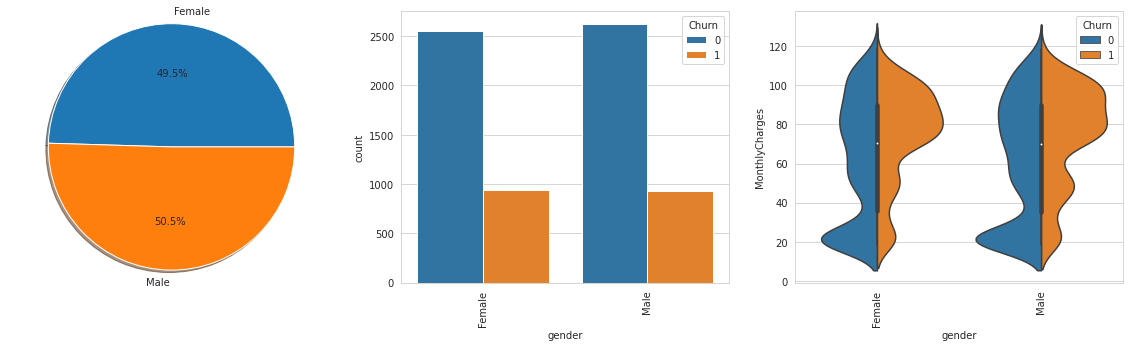

Female    0.269209
Male      0.261603
Name: gender, dtype: float64


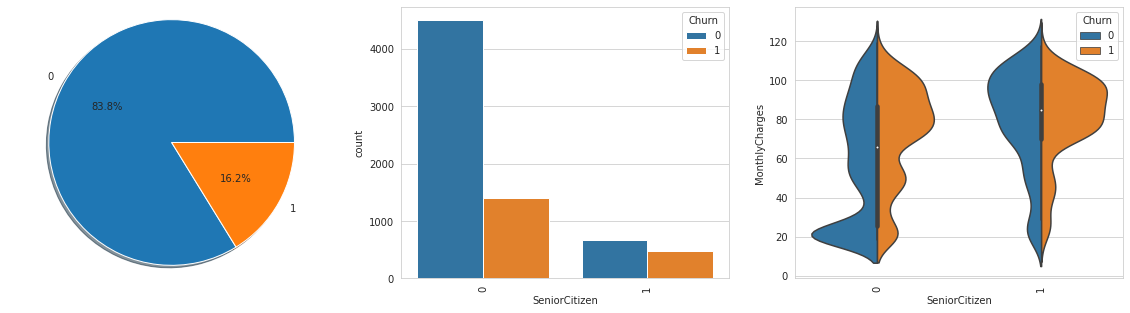

0    0.236062
1    0.416813
Name: SeniorCitizen, dtype: float64


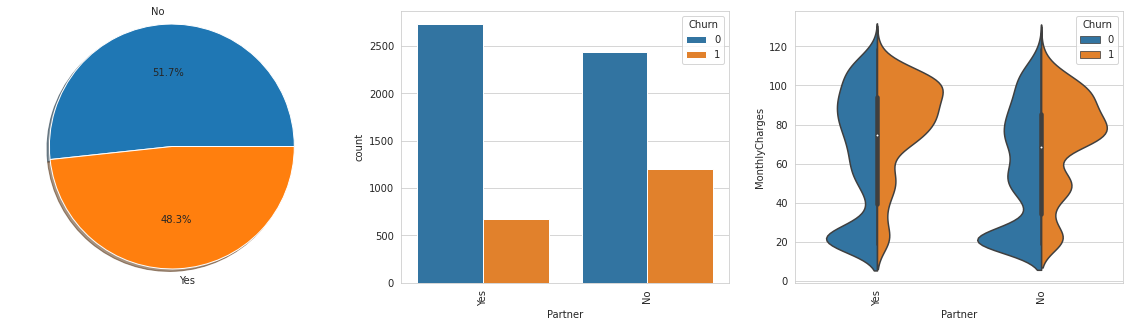

No     0.329580
Yes    0.196649
Name: Partner, dtype: float64


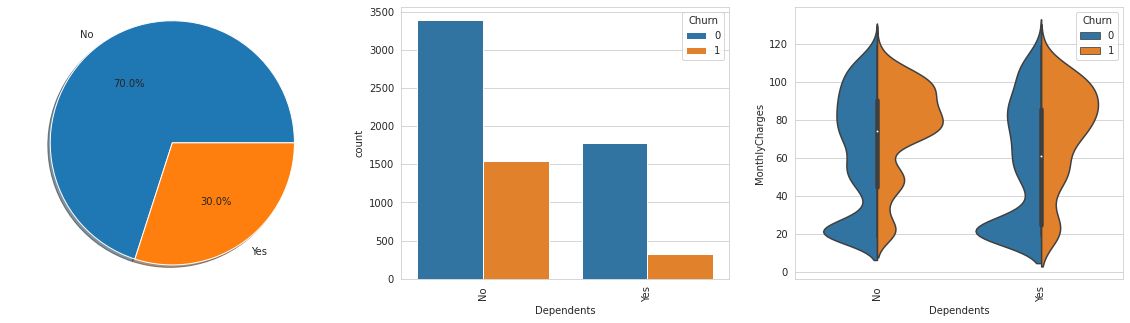

No     0.312791
Yes    0.154502
Name: Dependents, dtype: float64


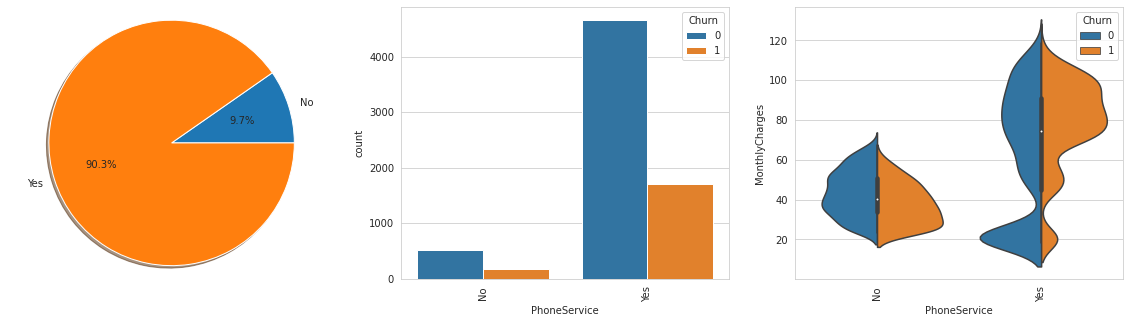

Yes    0.267096
No     0.249267
Name: PhoneService, dtype: float64


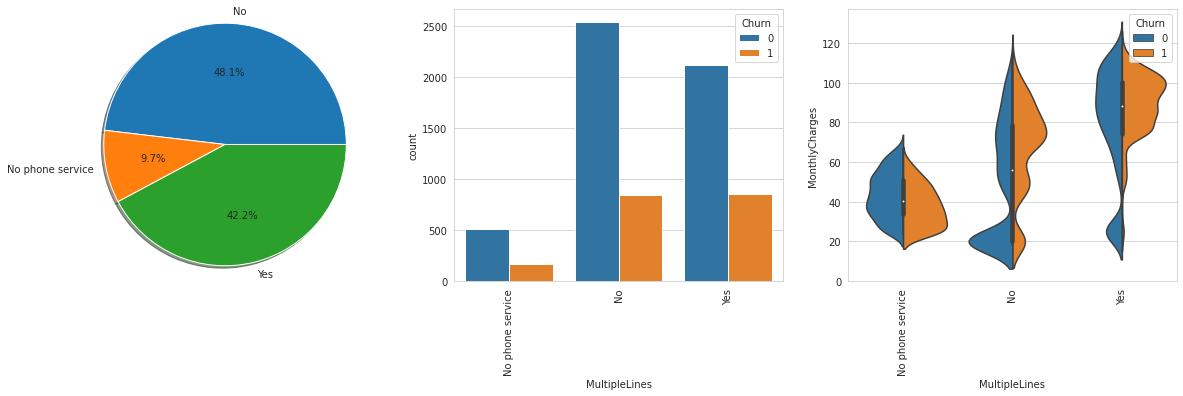

No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: MultipleLines, dtype: float64


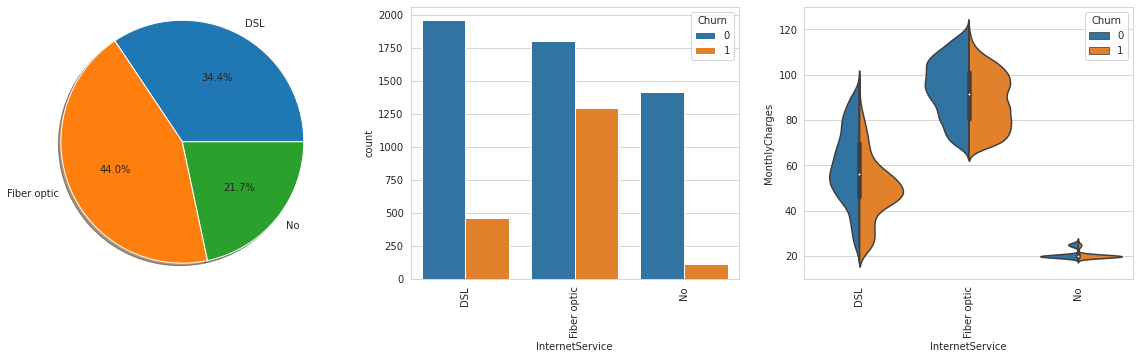

Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: InternetService, dtype: float64


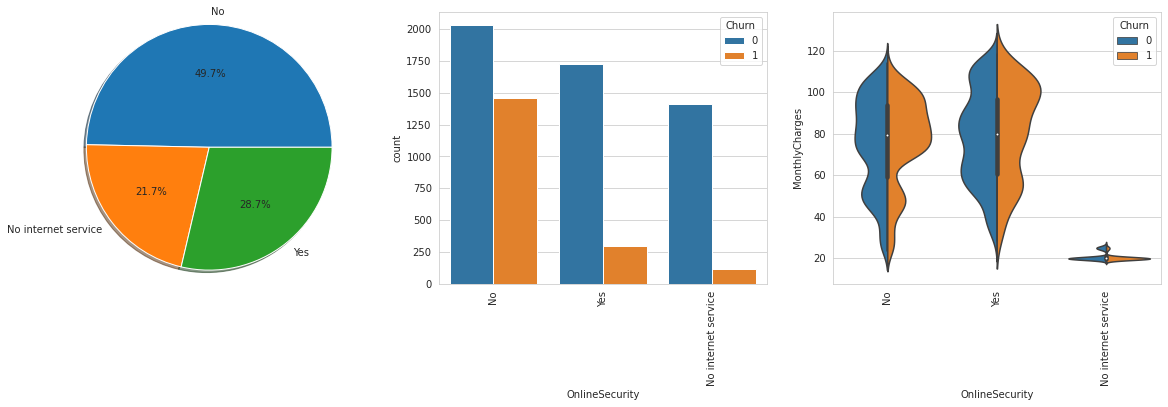

No                     0.417667
Yes                    0.146112
No internet service    0.074050
Name: OnlineSecurity, dtype: float64


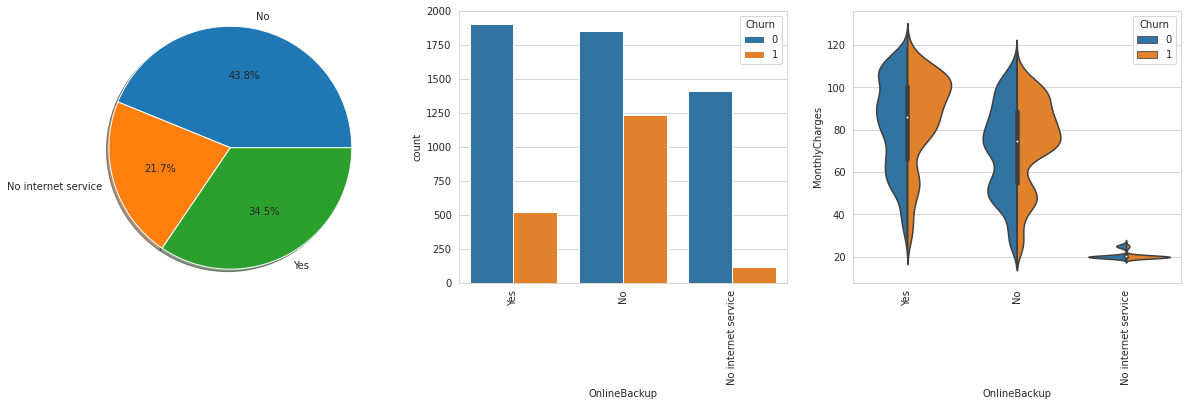

No                     0.399288
Yes                    0.215315
No internet service    0.074050
Name: OnlineBackup, dtype: float64


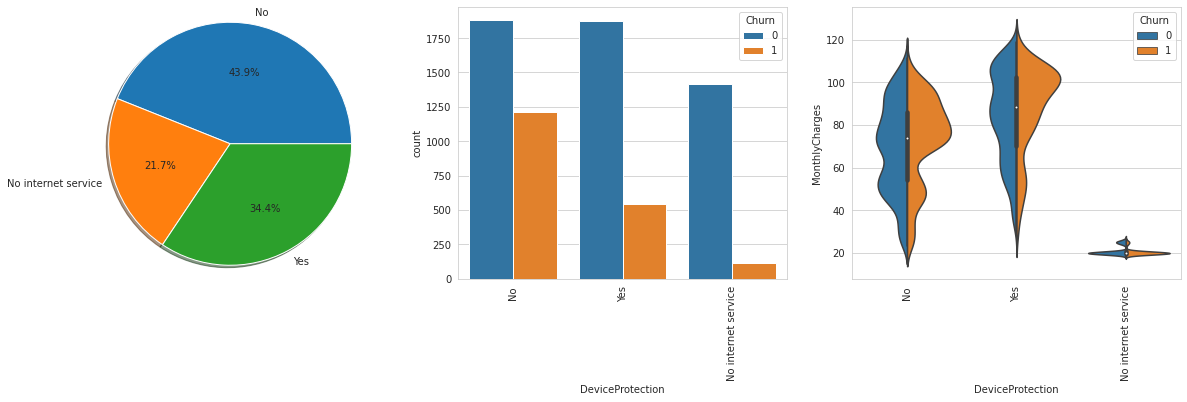

No                     0.391276
Yes                    0.225021
No internet service    0.074050
Name: DeviceProtection, dtype: float64


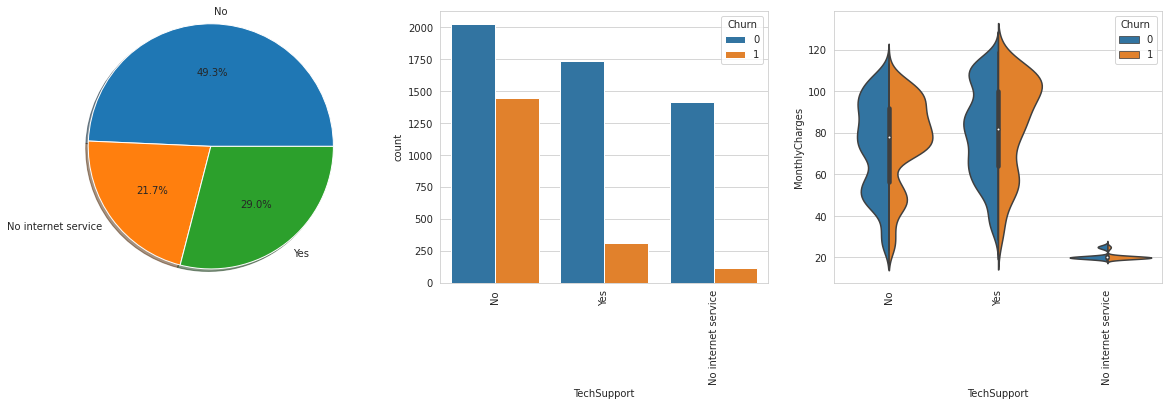

No                     0.416355
Yes                    0.151663
No internet service    0.074050
Name: TechSupport, dtype: float64


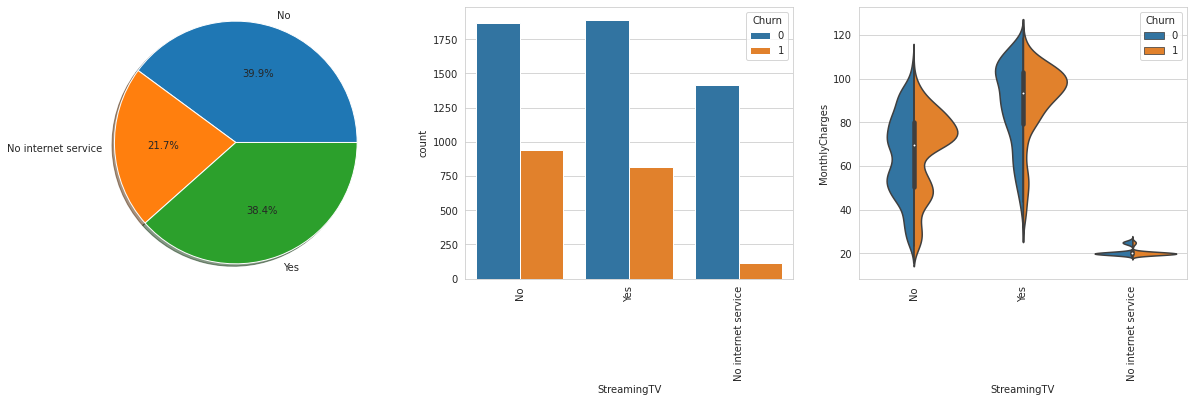

No                     0.335231
Yes                    0.300702
No internet service    0.074050
Name: StreamingTV, dtype: float64


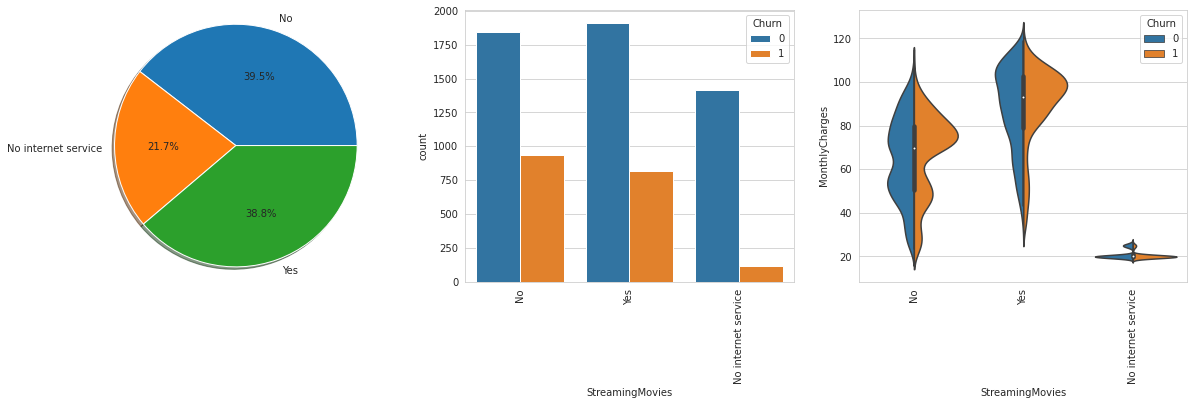

No                     0.336804
Yes                    0.299414
No internet service    0.074050
Name: StreamingMovies, dtype: float64


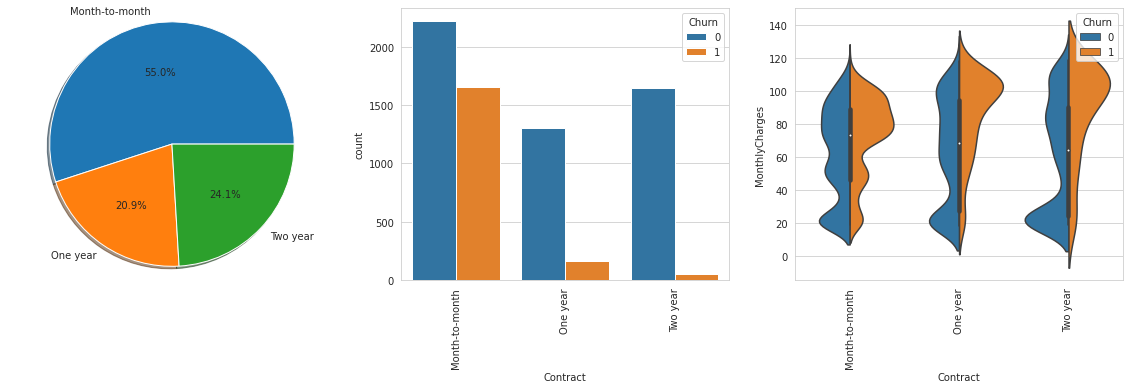

Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Contract, dtype: float64


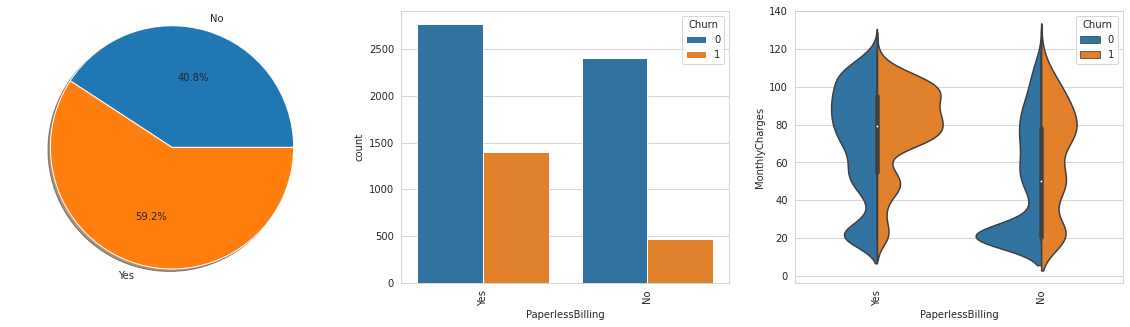

Yes    0.335651
No     0.163301
Name: PaperlessBilling, dtype: float64


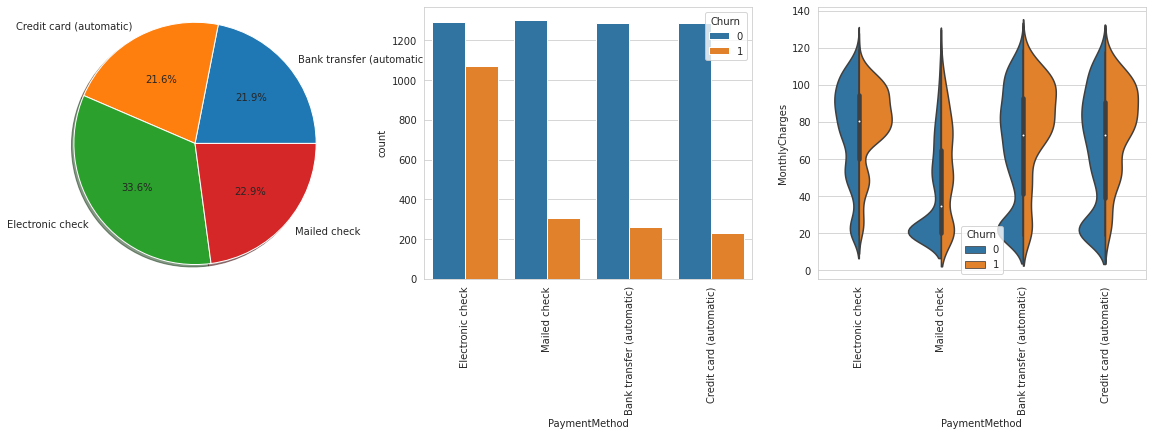

Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: PaymentMethod, dtype: float64


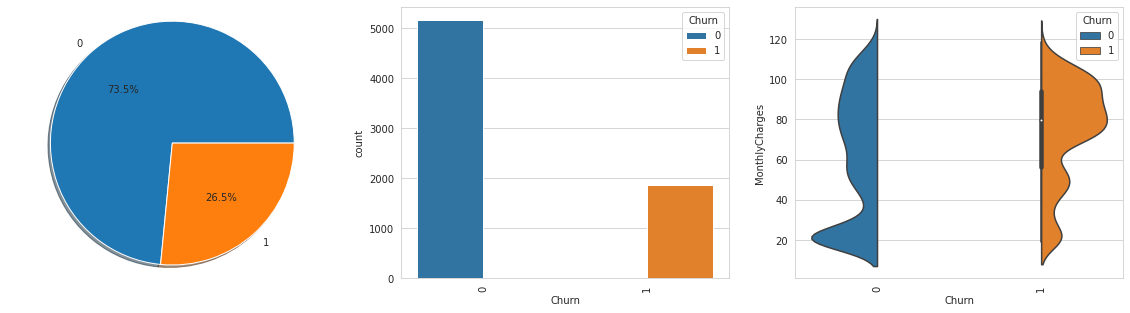

0    NaN
1    1.0
Name: Churn, dtype: float64


In [ ]:

for i in cat:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2,hue='Churn')
  ax2.set_xticklabels(labels=df[i].unique(),rotation=90)
  sns.violinplot(x=i,y='MonthlyCharges',data=df,ax=ax3,split=True,hue='Churn')
  ax3.set_xticklabels(labels=df[i].unique(),rotation=90)
  plt.show()
  print(df[i].loc[df['Churn']==1].value_counts()/df[i].value_counts())

1- Imbalanced dataset (74:26)



2- Payment method,paperless billing,contract,straming movies/tv, tech support, Device protection, online sequrity,internet service,Departments, senior citizen has high variance with o/p ratio and monthly charge

3-stramong movies and tv almost have same distributin.

4-multiple line,Phone service,gender,has low variance with o/p ratio and monthly charge 




In [ ]:
# making variable mc for low monthly charge anh high charge
df['mc']=1
for i in df.index:
  if df['MonthlyCharges'][i]<65:
    df['mc'][i]=0

In [ ]:
df['pro']=1
temp_cat=[]
num=[]
count=df.nunique()
for i in df.columns:
  if count[i] <= 20 and df[i].dtype=='int64':
    temp_cat.append(i)
  elif df[i].dtype=="O":
    temp_cat.append(i)
  else:
    num.append(i)

In [ ]:
df['pro']=1
def per_cat(df,feature,k,l):
  per_list=[]
  no_per_list=[]
  
  for i in df[feature].unique():
    temp=df.loc[df[feature]==i]
    per=(temp[feature].loc[temp['Churn']==1].count()/temp[feature].count())*100
    no_per=(temp[feature].loc[temp['Churn']==0].count()/temp[feature].count())*100
    per_list.append(per)
    no_per_list.append(no_per)
    if per>=40:
      temp['pro'].loc[temp[feature]==i]=1
    else:
      temp['pro'].loc[temp[feature]==i]=0
    df.loc[df[feature]==i]=temp
  per_list=[]
  return(df)


DataFrame new_feature is reflecting the relation of union of  two categorical variable and output


In [ ]:
new_feature=pd.DataFrame()
temp_cat.remove('Churn')
temp_cat.remove('pro')
for i in temp_cat:
  for j in temp_cat:
    if i != j:
      for k in df[i].unique():
        temp=df.loc[df[i]==k]
        #sns.countplot(x=j,data=temp)
        #plt.show()
        temp=per_cat(temp,j,k,i)
        df.loc[df[i]==k]=temp
      new_feature[i+'_'+j]=df['pro']

        
  temp_cat.remove(i)


Data filtering:-

In [ ]:
nf=new_feature.T.drop_duplicates(subset=None, keep='first', inplace=False).T

In [ ]:
nf['Churn']=df['Churn']

In [ ]:
x=nf.drop('Churn',axis=1)
y=nf.Churn

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
s = SelectKBest(chi2, k=12)
s.fit(x,y)

SelectKBest(k=12, score_func=<function chi2 at 0x7fcd566047a0>)

In [ ]:
temp_fea=list(pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)[-11:].index)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,mc,pro
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,1


In [ ]:
df.drop('pro',axis=1,inplace=True)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=42)

In [ ]:
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
def num_cat(df):
  num=[]
  cat=[]
  count=df.nunique()
  for i in df.columns:
    if count[i]>5:
     num.append(i)
    else:
      cat.append(i)
  return(num,cat)


from sklearn.preprocessing import power_transform as PT
def pow_tran(df,num):
  pt=pd.DataFrame()
  for i in num:
    if df[i].min()<=0:
     pt1=(df[i]-df[i].min()+0.0001)
    else:
     pt1=df[i]
    pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

  pt1=PT(pt)
  pt1=pd.DataFrame(pt1,columns=num)
  return(pt1)

def cat_plot(df,cat): 
  for i in cat:
   labels = df[i].astype('category').cat.categories.tolist()
   counts = df[i].value_counts()
   sizes = [counts[var_cat] for var_cat in labels]
   fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
   ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
   ax1.axis('equal')
   plt.xlabel(i)
   sns.countplot(x=i,data=df,ax=ax2,hue='Churn')
   ax2.set_xticklabels(labels=df[i].unique(),rotation=90)
   plt.show()
   print(df[i].loc[df['Churn']==1].value_counts()/df[i].value_counts())

import scipy.stats as stat
import pylab 
def num_plot(df,num):
  for i in num:
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True,hue='Churn')
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W'data=df,kde=True,hue='Churn')
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()


def z_outlier(df,num):
  df_z=df[num]
  z=np.abs(stat.zscore(df_z))
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  return(df_z)

def stan_sc(df,num):
  ss=StandardScaler()
  x=df[num].to_numpy()
  x1=pd.DataFrame(ss.fit_transform(x),columns=num)
  return(x1)


In [ ]:
def pipeline_viz(df):
  num,cat=num_cat(df)
  cat_plot(df,cat)
  num_plot(df,num)
  ohe=pd.get_dummies(df[cat])
  df[num]=pow_tran(df,num)
  df[num]=stan_sc(df,num)
  num_plot(df,num)
  df[num]=z_outlier(df,num)
  return (pd.concat([ohe,df.drop(cat,axis=1)],axis=1))


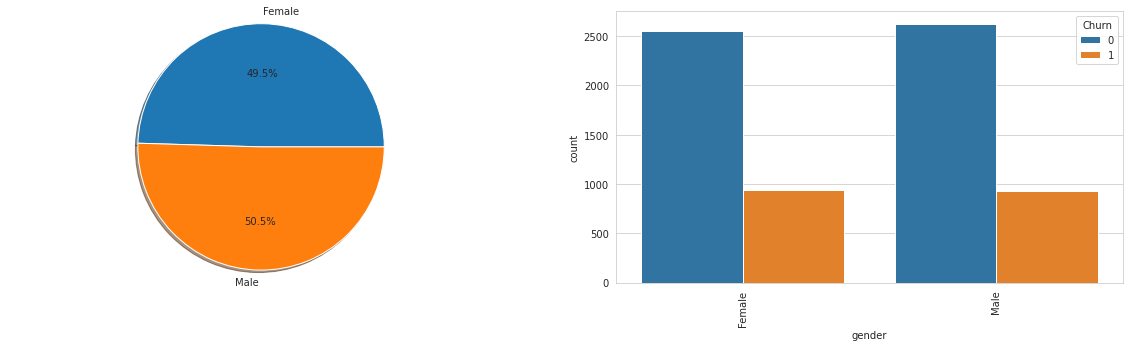

Female    0.269209
Male      0.261603
Name: gender, dtype: float64


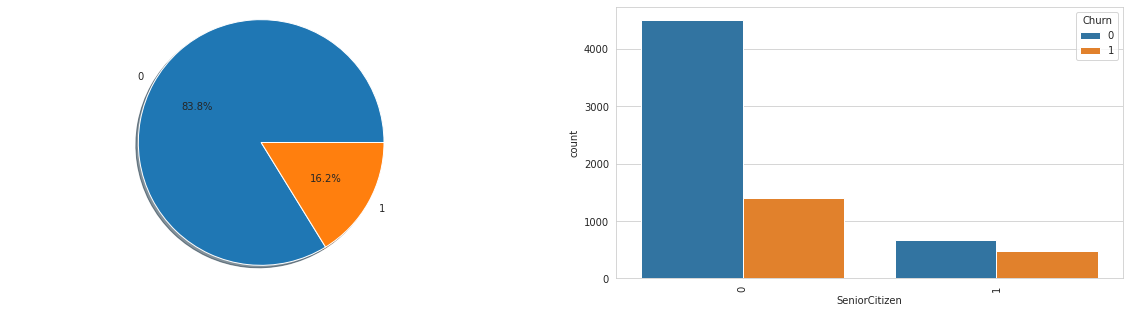

0    0.236062
1    0.416813
Name: SeniorCitizen, dtype: float64


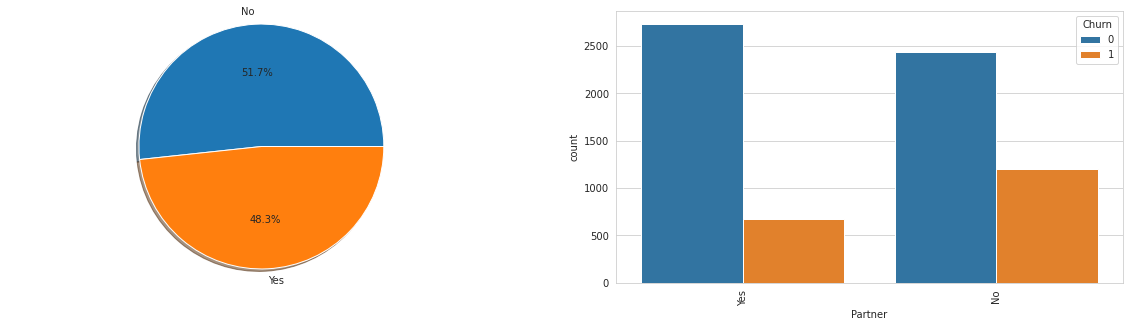

No     0.329580
Yes    0.196649
Name: Partner, dtype: float64


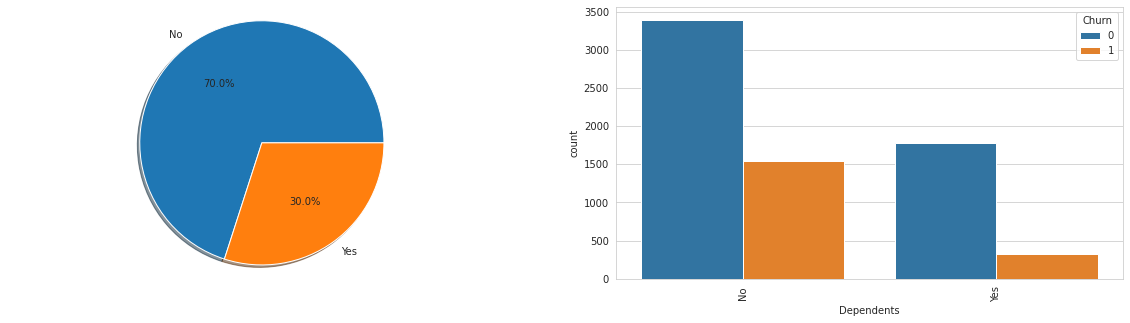

No     0.312791
Yes    0.154502
Name: Dependents, dtype: float64


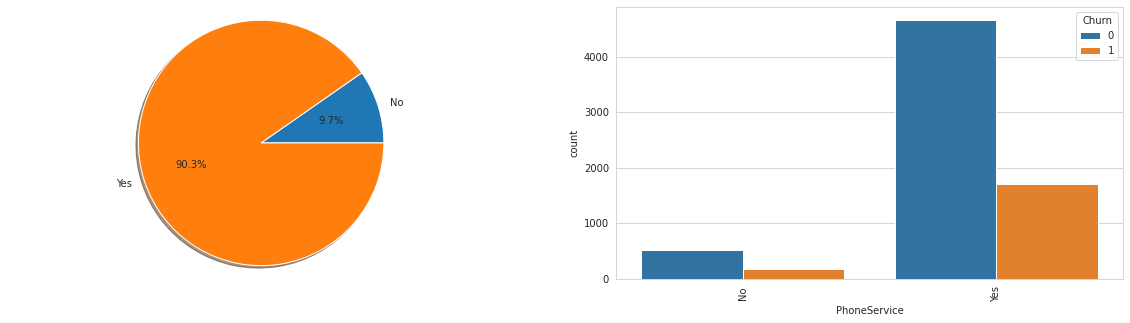

Yes    0.267096
No     0.249267
Name: PhoneService, dtype: float64


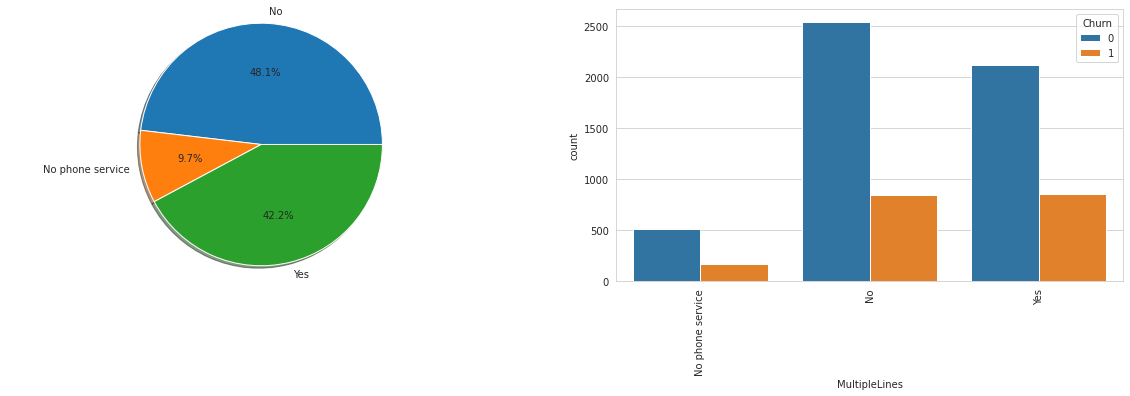

No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: MultipleLines, dtype: float64


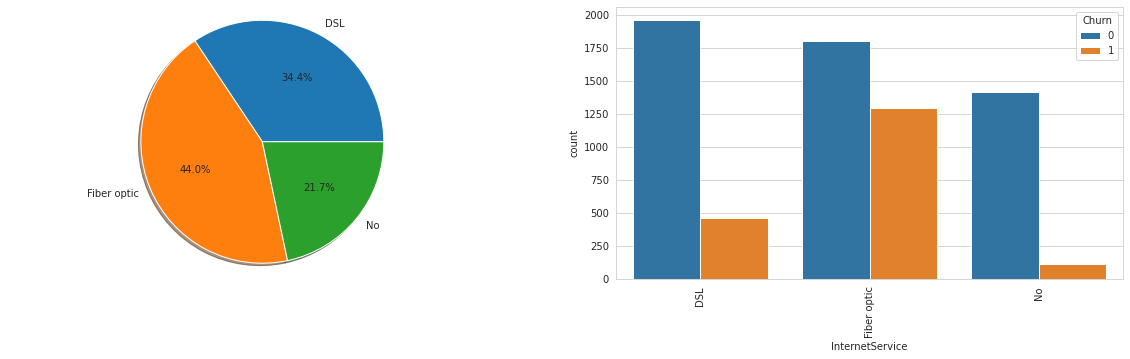

Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: InternetService, dtype: float64


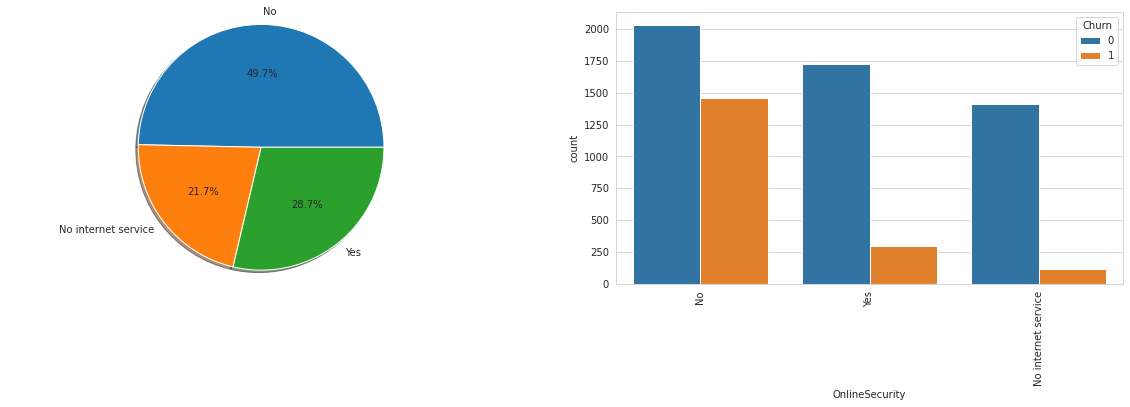

No                     0.417667
Yes                    0.146112
No internet service    0.074050
Name: OnlineSecurity, dtype: float64


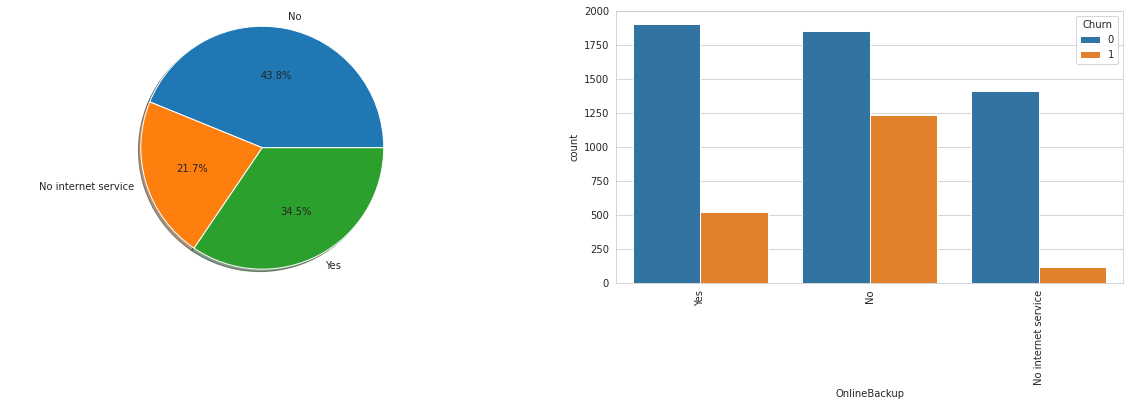

No                     0.399288
Yes                    0.215315
No internet service    0.074050
Name: OnlineBackup, dtype: float64


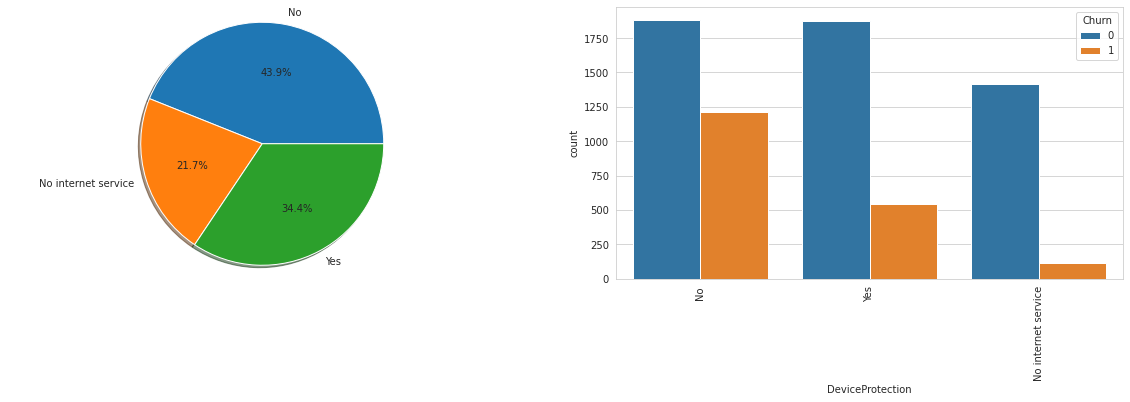

No                     0.391276
Yes                    0.225021
No internet service    0.074050
Name: DeviceProtection, dtype: float64


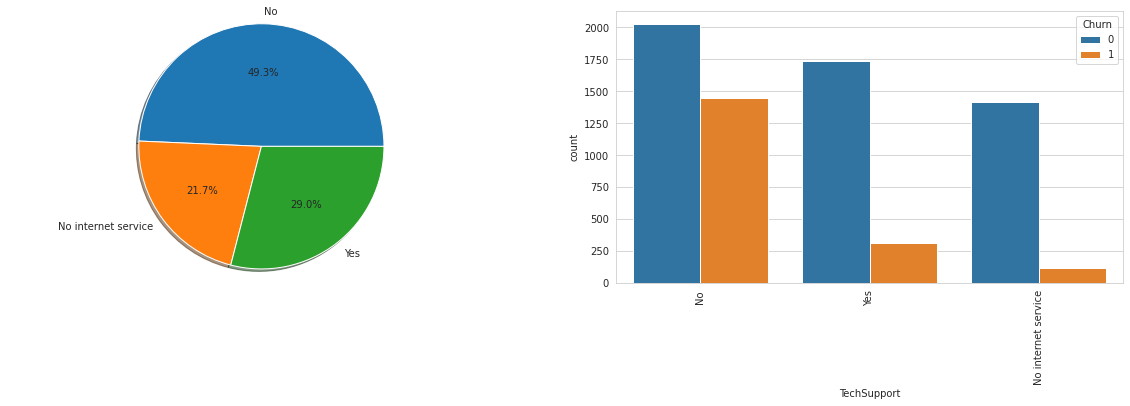

No                     0.416355
Yes                    0.151663
No internet service    0.074050
Name: TechSupport, dtype: float64


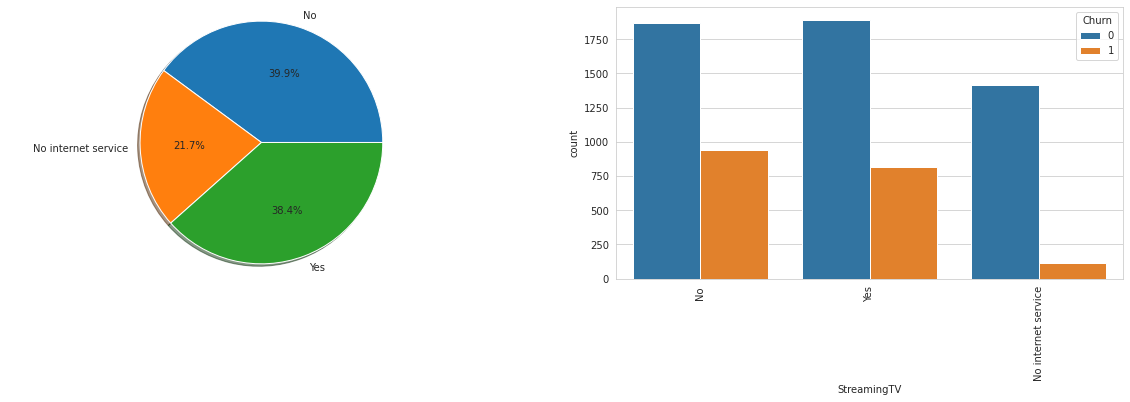

No                     0.335231
Yes                    0.300702
No internet service    0.074050
Name: StreamingTV, dtype: float64


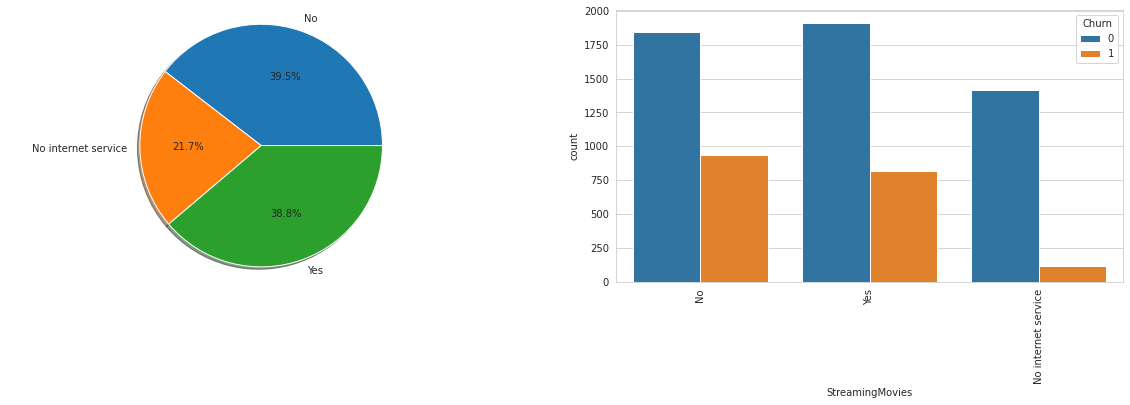

No                     0.336804
Yes                    0.299414
No internet service    0.074050
Name: StreamingMovies, dtype: float64


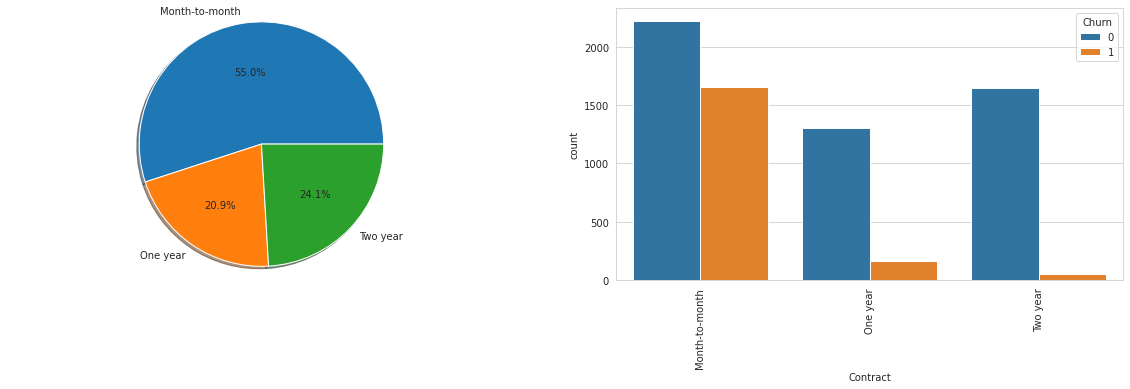

Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Contract, dtype: float64


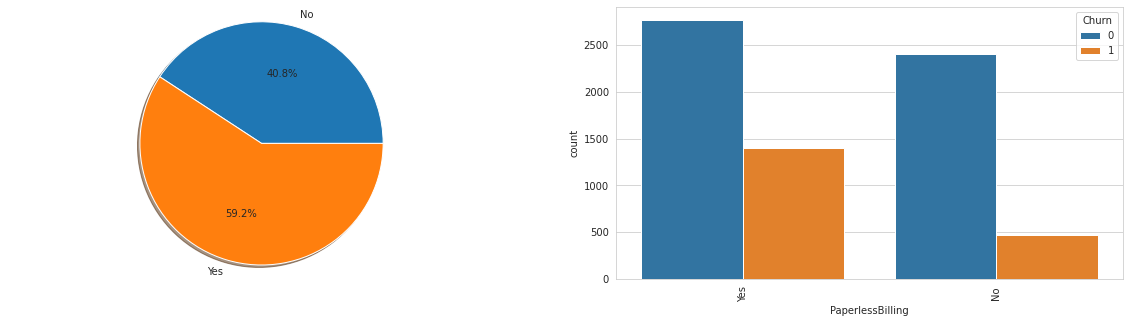

Yes    0.335651
No     0.163301
Name: PaperlessBilling, dtype: float64


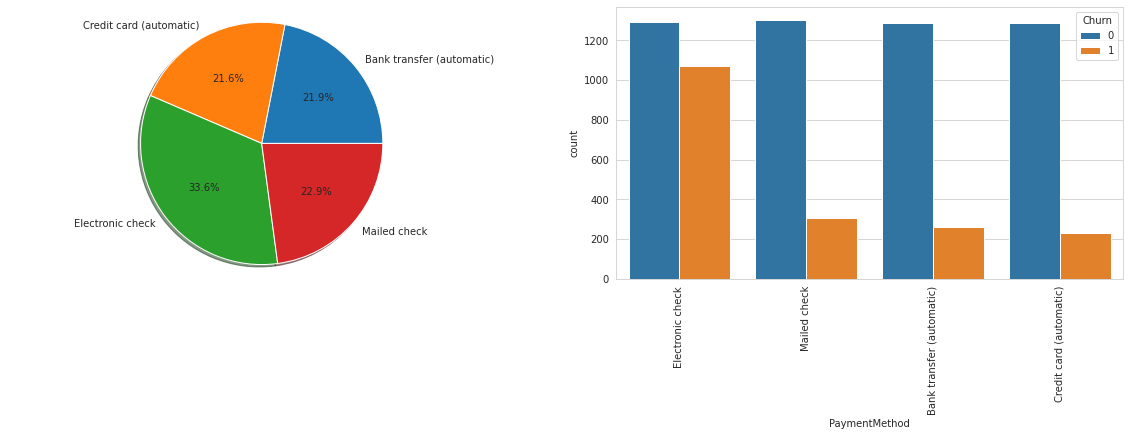

Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: PaymentMethod, dtype: float64


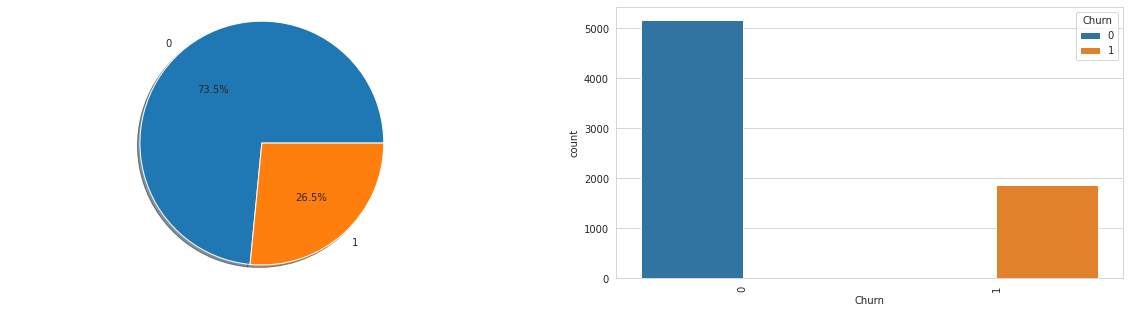

0    NaN
1    1.0
Name: Churn, dtype: float64


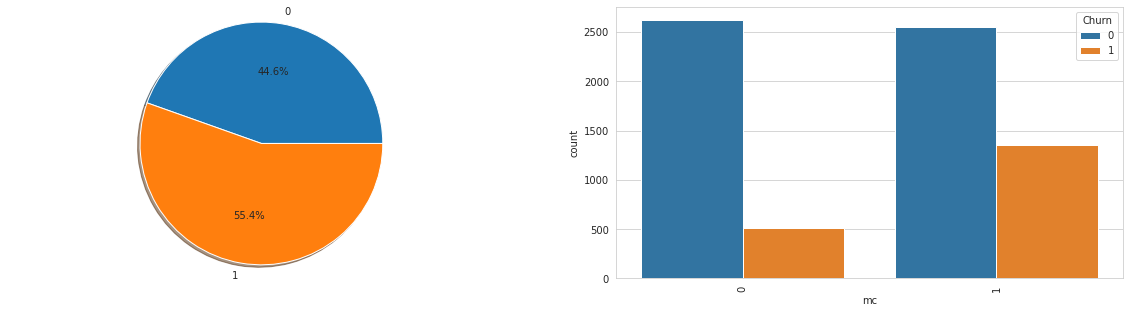

1    0.347080
0    0.163746
Name: mc, dtype: float64


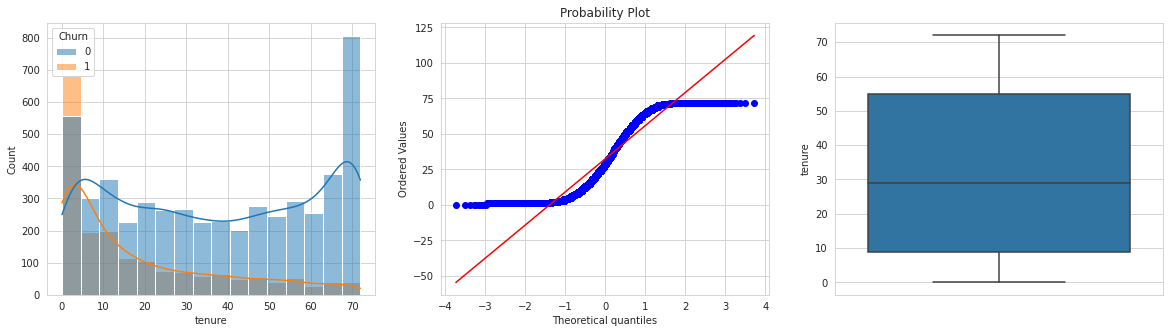

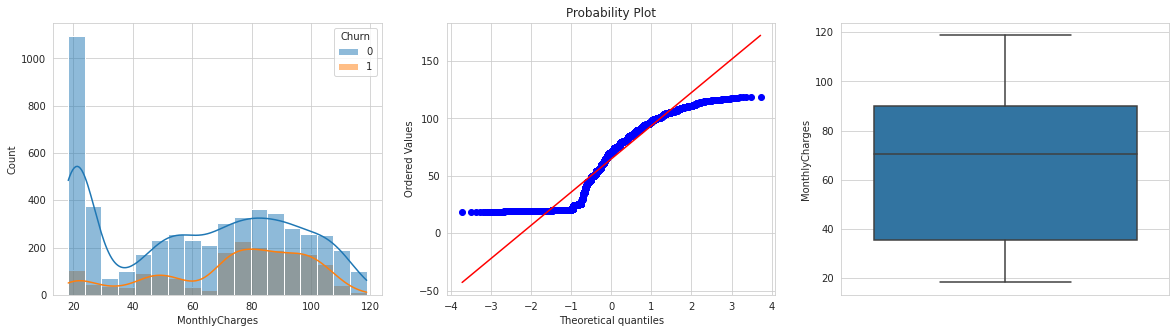

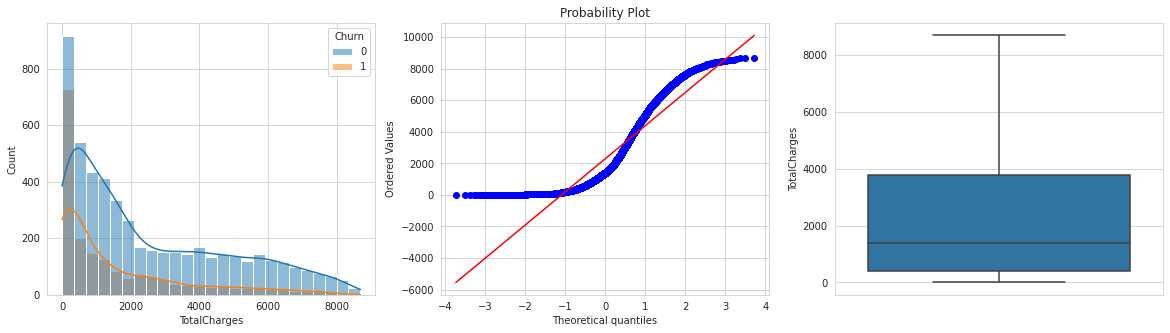

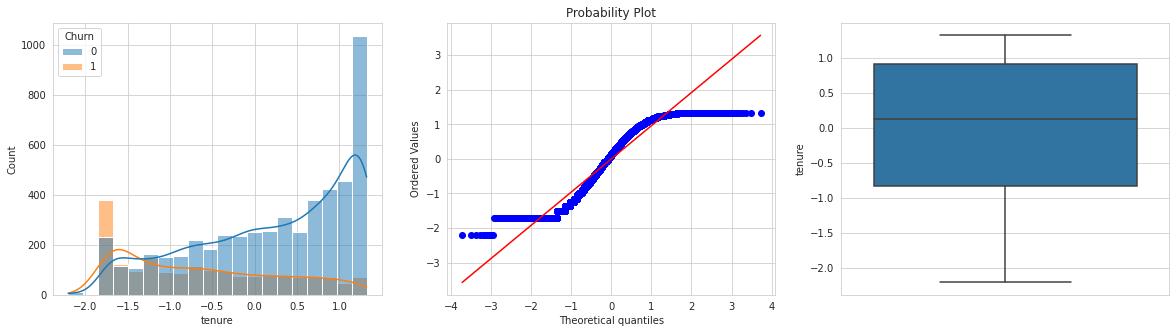

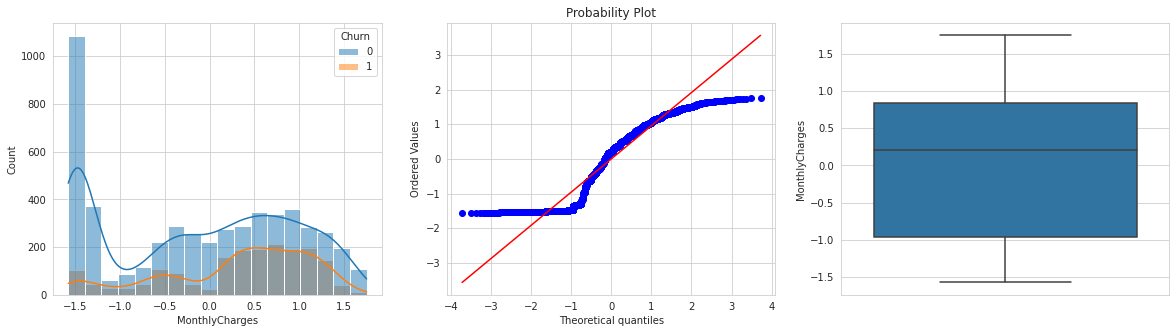

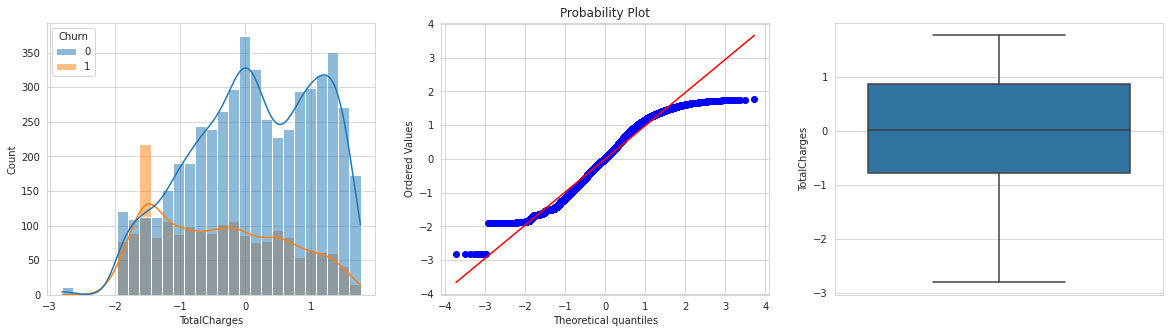

Percent of data retained = 1.0


In [ ]:
df_new=pipeline_viz(df)

In [ ]:
df_new

,SeniorCitizen,Churn,mc,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,-1.696930,-1.158157,-1.785046
1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0.308262,-0.236899,0.253364
2,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,-1.508553,-0.340068,-1.371123
3,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0.647703,-0.728976,0.232363
4,0,1,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,-1.508553,0.215555,-1.236424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,-0.057907,0.672141,0.295632
7039,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1.322631,1.258885,1.569047
7040,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,-0.696403,-1.166908,-0.851884
7041,1,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,-1.251023,0.336029,-0.914155


## **Encoding**:-

In [ ]:
ohe=pd.get_dummies(df[cat])

In [ ]:
df_encoding=pd.concat([ohe,nf[temp_fea],df[num]],axis=1)

In [ ]:
df_encoding.head()

,SeniorCitizen,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_OnlineSecurity,InternetService_PaymentMethod,PaperlessBilling_Contract,TechSupport_PaymentMethod,TechSupport_OnlineSecurity,OnlineBackup_Contract,StreamingMovies_Contract,mc_Contract,TechSupport_Contract,InternetService_Contract,gender_Partner,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,1,0,0,-1.696930,-1.158157,-1.785046
1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.308262,-0.236899,0.253364
2,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,-1.508553,-0.340068,-1.371123
3,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.647703,-0.728976,0.232363
4,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,-1.508553,0.215555,-1.236424


In [ ]:
df_encoding=df_encoding.T.drop_duplicates(subset=None, keep='first', inplace=False).T# removing duplicate columns

## **Changing Data type**

In [ ]:
df_encoding=df_encoding.astype(float)

In [ ]:
x=df_encoding.drop('Churn',axis=1)
y=df_encoding['Churn']

In [ ]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   float64
 1   Churn                                    7043 non-null   float64
 2   gender_Female                            7043 non-null   float64
 3   gender_Male                              7043 non-null   float64
 4   Partner_No                               7043 non-null   float64
 5   Partner_Yes                              7043 non-null   float64
 6   Dependents_No                            7043 non-null   float64
 7   Dependents_Yes                           7043 non-null   float64
 8   PhoneService_No                          7043 non-null   float64
 9   PhoneService_Yes                         7043 non-null   float64
 10  MultipleLines_No                         7043 no

In [ ]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in num:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=num)


In [ ]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

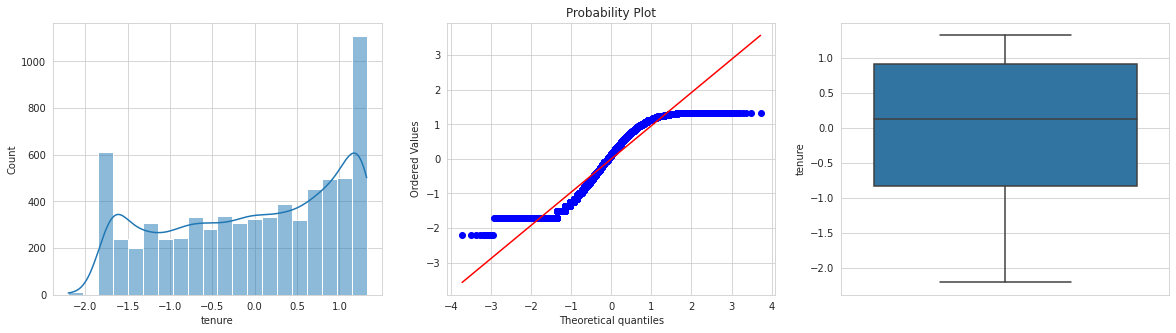

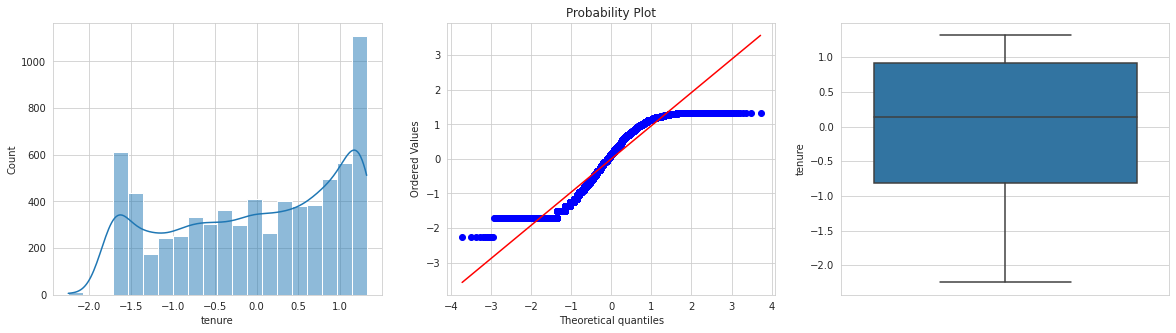

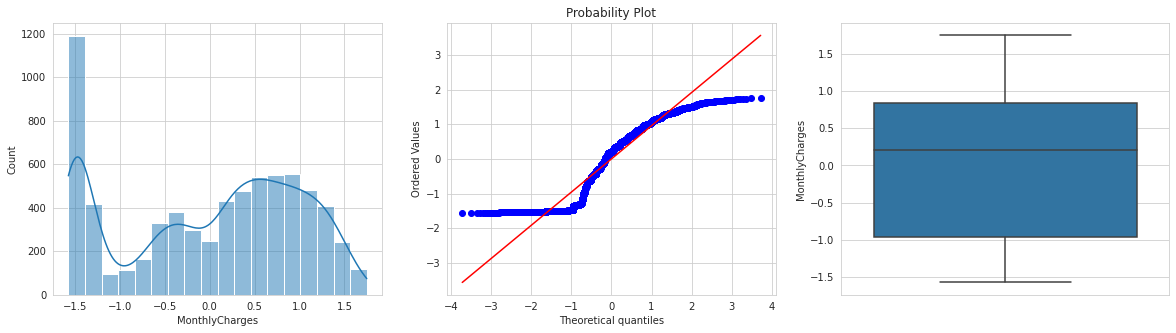

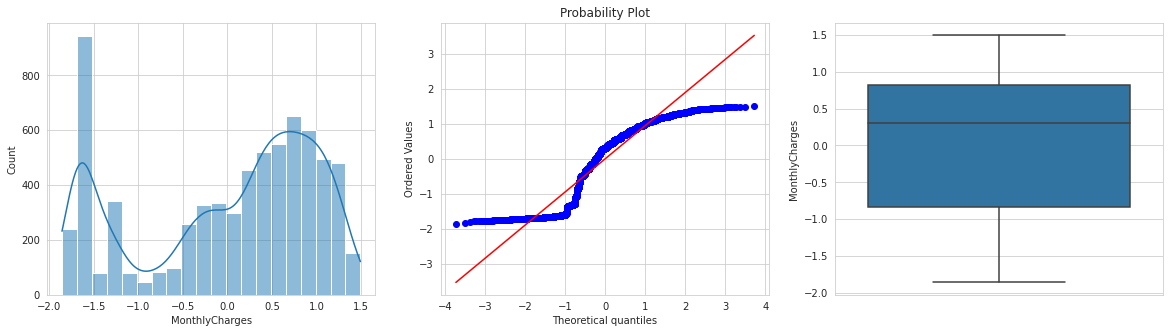

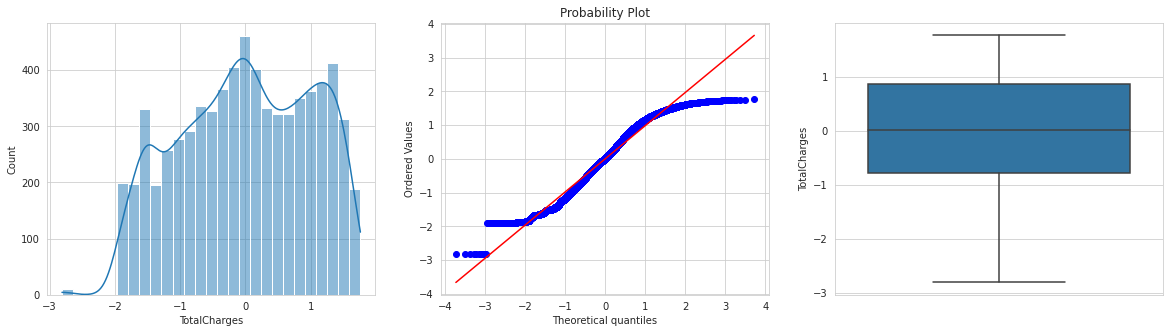

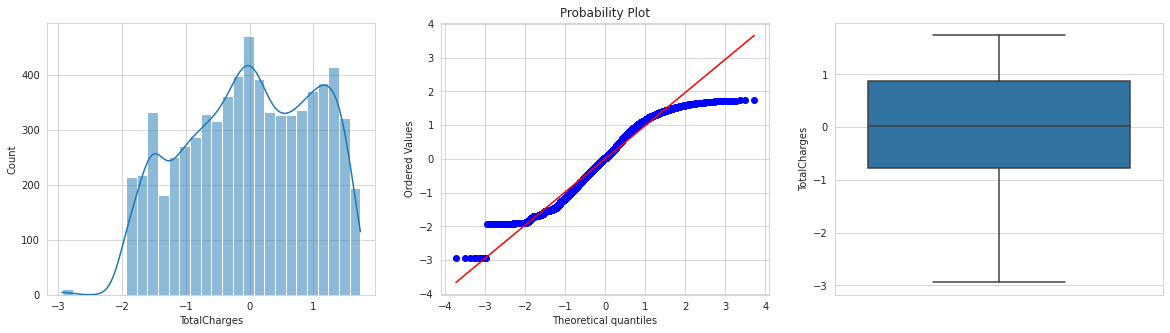

In [ ]:
import scipy.stats as stat
import pylab 
pt1=pd.DataFrame(pt1,columns=num)
#pd.concat([pt1,df.quality],axis=1)
for i in num:
  pplot(df,i)
  pplot(pt1,i)

Normalization and outlieres are taken care of 

In [ ]:
#df_encoding[num]=pt1[num]

## **Correlation**

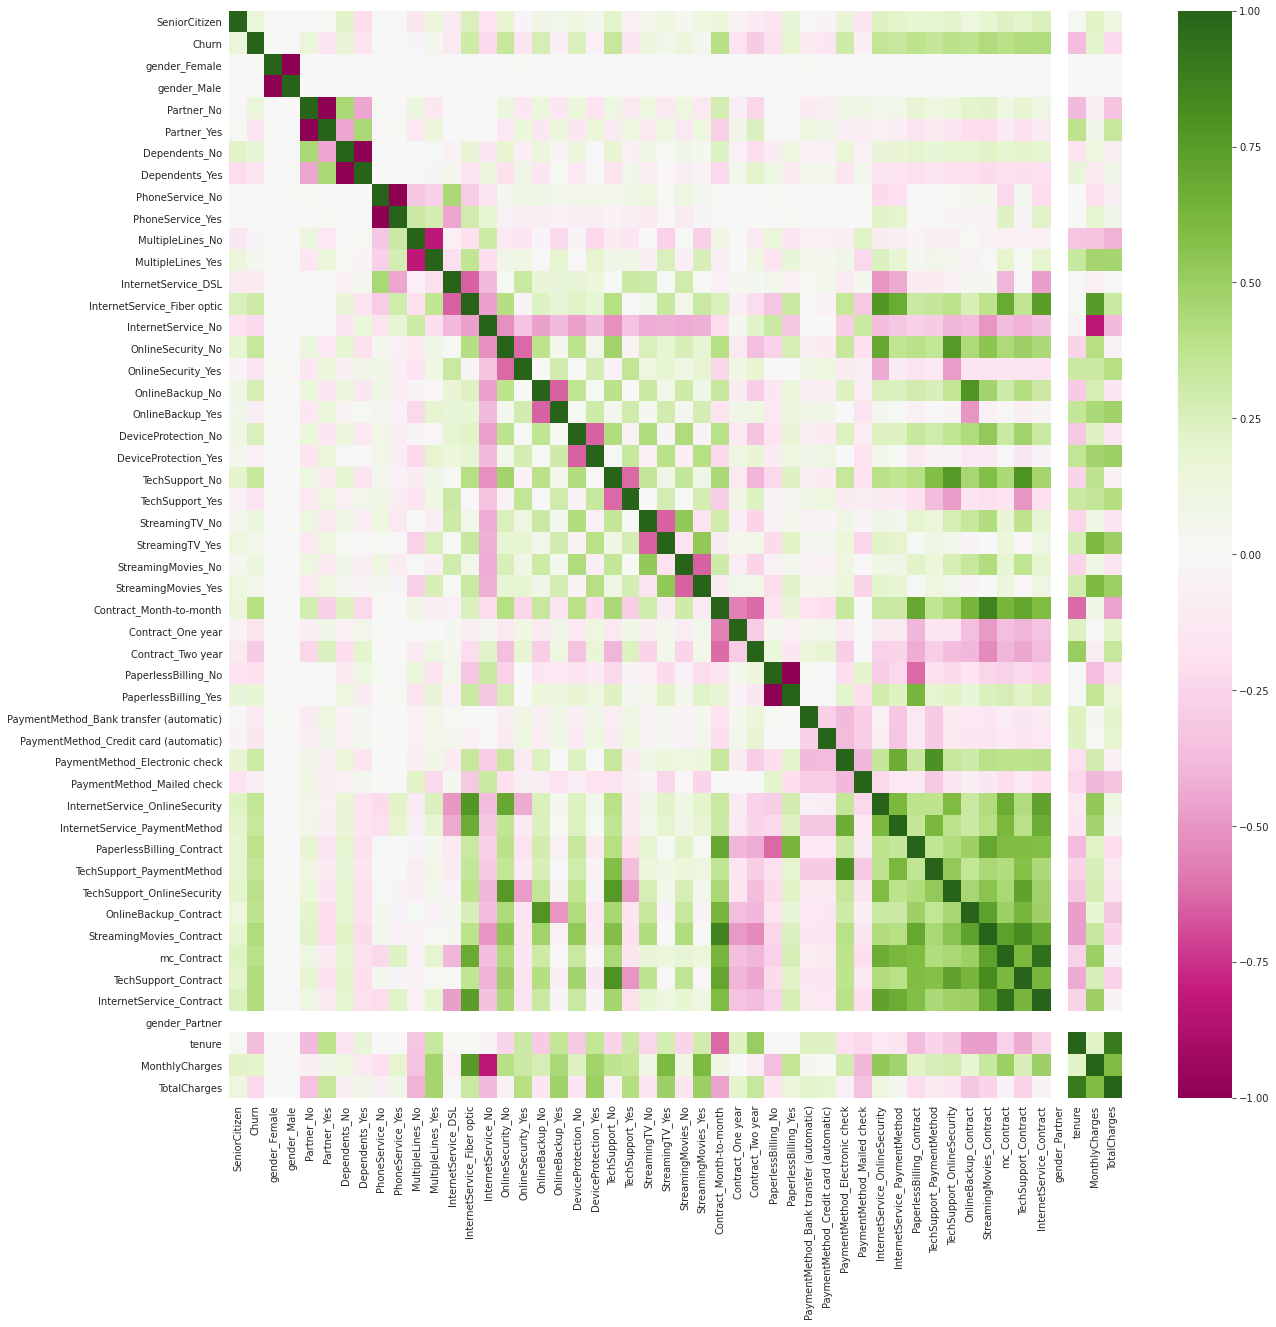

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_encoding.corr(),annot=False,cmap='PiYG')

Multicolinearity exists

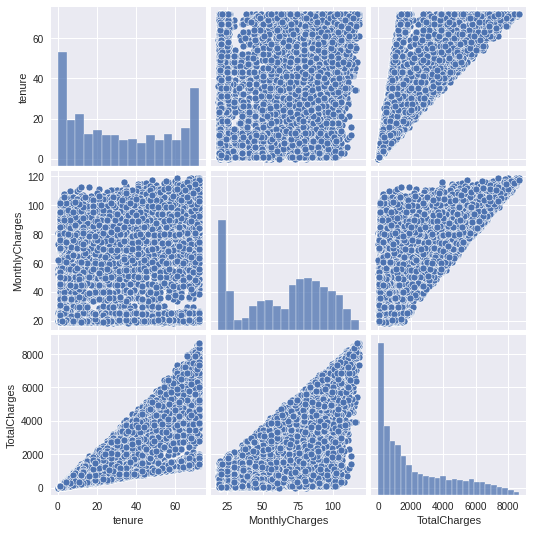

In [ ]:
sns.pairplot(df_encoding[num])

## **chi-square test**

In [ ]:
x=df_encoding.drop('Churn',axis=1)
y=df_encoding.Churn

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
s = SelectKBest(chi2, k=12)
s.fit(x.drop(num,axis=1),y)

SelectKBest(k=12, score_func=<function chi2 at 0x7f2f2a850710>)

In [ ]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.drop(num,axis=1).columns).T.sort_values(by=0)

,0,1
PhoneService_Yes,0.097261,7.551421e-01
gender_Male,0.258699,6.110156e-01
gender_Female,0.263668,6.076114e-01
PhoneService_No,0.907148,3.408723e-01
MultipleLines_No,3.874782,4.901667e-02
MultipleLines_Yes,6.548512,1.049719e-02
StreamingMovies_Yes,16.242531,5.572887e-05
StreamingTV_Yes,17.334235,3.134881e-05
DeviceProtection_Yes,20.226662,6.878750e-06
OnlineBackup_Yes,31.217694,2.306541e-08


top 5 feture are not related to churn 

## **Separating dependent and independent variables**

In [ ]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

In [ ]:
def z_outlier(a,b):
  df_z=pd.concat([a,b],axis=1)
  z=np.abs(stat.zscore(df_z[num]))
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  x_z=df_z.drop('Churn',axis=1)
  y_z=df_z.Churn
  return(x_z,y_z)

In [ ]:
x_train,y_train=z_outlier(x_train,y_train)


Percent of data retained = 1.0


In [ ]:
x_train_scaler= ss.transform(x_train)

# **Model Evaluation**

In [ ]:
def clf(model,x,y,x_test,y_test):
  clf_lr = model.fit(x, y)
  y_pred=clf_lr.predict(x_test)
  print(confusion_matrix(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  lr_acc=f1_score(y_test,y_pred)
  cv_results = cross_validate(model, x, y, cv=10,scoring='f1')
  lr_score=cv_results['test_score'].mean()
  return(lr_acc,lr_score)

lr_acc,lr_score=clf(LogisticRegression(),x_train_scaler,y_train,x_test_scaler,y_test)
rfc_acc,rfc_score=clf(RFC(),x_train_scaler,y_train,x_test_scaler,y_test)
xgc_acc,xgc_score=clf(XBC(),x_train_scaler,y_train,x_test_scaler,y_test)
etc_acc,etc_score=clf(ETC(),x_train_scaler,y_train,x_test_scaler,y_test)
svc_acc,svc_score=clf(SVC(),x_train_scaler,y_train,x_test_scaler,y_test)
score=[lr_score,rfc_score,xgc_score,etc_score,svc_score]
error=[lr_acc,rfc_acc,xgc_acc,etc_acc,svc_acc]
name=['LR','RFC','XGB','ETC','SVC']
diff=[]
for i in range(5):
  diff.append(score[i]-error[i])
pd.DataFrame([name,score,error,diff]).T

[[467  44]
 [ 91 103]]
0.8085106382978723
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       511
         1.0       0.70      0.53      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705

[[459  52]
 [103  91]]
0.7801418439716312
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       511
         1.0       0.64      0.47      0.54       194

    accuracy                           0.78       705
   macro avg       0.73      0.68      0.70       705
weighted avg       0.77      0.78      0.77       705

[[470  41]
 [ 91 103]]
0.8127659574468085
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       511
         1.0       0.72      0.53      0.61       194

    accuracy                           0.81       705
  

,0,1,2,3
0,LR,0.586756,0.604106,-0.0173498
1,RFC,0.547208,0.540059,0.00714841
2,XGB,0.581811,0.609467,-0.0276562
3,ETC,0.515049,0.543909,-0.0288603
4,SVC,0.564131,0.601156,-0.0370249


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0).fit(x_train_scaler, y_train)
y_pred=clf_lr.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
lr_acc=f1_score(y_test,y_pred)


[[467  44]
 [ 91 103]]
0.8085106382978723
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       511
         1.0       0.70      0.53      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf_lr, ss.transform(x), y, cv=10,scoring='f1')

lr_score=cv_results['test_score'].mean()



In [ ]:
lr_score

0.5892301913873178

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
clf_rfc = RFC().fit(x_train, y_train)
y_pred=clf_rfc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
rfc_acc=f1_score(y_test,y_pred)

[[455  56]
 [ 98  96]]
0.7815602836879433
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       511
         1.0       0.63      0.49      0.55       194

    accuracy                           0.78       705
   macro avg       0.73      0.69      0.71       705
weighted avg       0.77      0.78      0.77       705



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFC(), x, y, cv=10,scoring='f1')

rfc_score=cv_results['test_score'].mean()


## **XGB Classifier**

In [ ]:
from xgboost import XGBClassifier as XBC
xgc=XBC().fit(x_train,y_train)

y_pred = xgc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
xgc_acc=f1_score(y_test,y_pred)

[[470  41]
 [ 91 103]]
0.8127659574468085
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       511
         1.0       0.72      0.53      0.61       194

    accuracy                           0.81       705
   macro avg       0.78      0.73      0.74       705
weighted avg       0.80      0.81      0.80       705



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBC(), x, y, cv=10,scoring='f1')

xgc_score=cv_results['test_score'].mean()




## **Ada Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ABC 
abc=ABC().fit(x_train,y_train)

y_pred = abc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
abc_acc=f1_score(y_test,y_pred)

[[462  49]
 [ 79 115]]
0.8184397163120567
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       511
         1.0       0.70      0.59      0.64       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.76       705
weighted avg       0.81      0.82      0.81       705



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ABC(), x, y, cv=10,scoring='f1')

abc_score=cv_results['test_score'].mean()



## **Extra Tree Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier as ETC 

etc = ETC(random_state=123)
etc.fit(x_train, y_train)
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
etc_acc=f1_score(y_test,y_pred)

[[452  59]
 [101  93]]
0.7730496453900709
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       511
         1.0       0.61      0.48      0.54       194

    accuracy                           0.77       705
   macro avg       0.71      0.68      0.69       705
weighted avg       0.76      0.77      0.76       705



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETC(), x, y, cv=10,scoring='f1')

etc_score=cv_results['test_score'].mean()


## **Support vector classifier**

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=123)
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
svc_acc=f1_score(y_test,y_pred)

[[463  48]
 [ 90 104]]
0.8042553191489362
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       511
         1.0       0.68      0.54      0.60       194

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.74       705
weighted avg       0.80      0.80      0.80       705



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVC(), ss.transform(x), y, cv=10,scoring='f1')

svc_score=cv_results['test_score'].mean()


In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier as EEC
enc = EEC(random_state=123)
enc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
enc_acc=f1_score(y_test,y_pred)

[[463  48]
 [ 90 104]]
0.8042553191489362
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       511
         1.0       0.68      0.54      0.60       194

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.74       705
weighted avg       0.80      0.80      0.80       705



## **Comparing models**

In [ ]:
score=[lr_score,rfc_score,xgc_score,etc_score,svc_score]
error=[lr_acc,rfc_acc,xgc_acc,etc_acc,svc_acc]
name=['LR','RFC','XGB','ETC','SVC']
diff=[]
for i in range(5):
  diff.append(score[i]-error[i])
pd.DataFrame([name,score,error,diff]).T

,0,1,2,3
0,LR,0.596743,0.642458,-0.045715
1,RFC,0.549221,0.560472,-0.0112506
2,XGB,0.588995,0.609467,-0.0204729
3,ETC,0.521441,0.542857,-0.0214164
4,SVC,0.565587,0.608696,-0.0431087


Difference of all the model is very small so its better tochoose the model having best score i.e XGB

# Over-Sampeling

In [ ]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(1)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)

x_train_ns=pd.DataFrame(x_train_ns)
x_train_ns.columns=x_train.columns
xgc=XBC().fit(x_train_ns,y_train_ns)

y_pred = xgc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
xgc_acc=f1_score(y_test,y_pred)

[[449  62]
 [ 65 129]]
0.8198581560283688
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       511
         1.0       0.68      0.66      0.67       194

    accuracy                           0.82       705
   macro avg       0.77      0.77      0.77       705
weighted avg       0.82      0.82      0.82       705



# **Hyper-parameter tuning** 

## **XG Boost**




In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    
}

xg_grid = GridSearchCV(XBC(n_jobs=-1), params, n_jobs=-1, cv=3,scoring='f1')
xg_grid.fit(x_train_ns, y_train_ns)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 0.7851591224494947
Best score: {'gamma': 0.5, 'learning_rate': 0.01, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.5}
Best score: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBC(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), x, y, cv=10,scoring='f1')

cv_results['test_score'].mean()

0.5714543463292687

# **Best Model Evaluation**

In [ ]:
model=XBC(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

x_ns,y_ns=os.fit_sample(x,y)

from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, x_ns, y_ns, cv=10)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_ns,y_pred))
print(accuracy_score(y_ns,y_pred))
print(classification_report(y_ns,y_pred))


[[4093  708]
 [ 760 3264]]
0.8336543909348442
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      4801
         1.0       0.82      0.81      0.82      4024

    accuracy                           0.83      8825
   macro avg       0.83      0.83      0.83      8825
weighted avg       0.83      0.83      0.83      8825



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_ns, y_ns, cv=10)

cv_results['test_score']

array([0.7599094 , 0.77123443, 0.75311438, 0.76557191, 0.87542469,
       0.86621315, 0.8877551 , 0.88321995, 0.89569161, 0.87868481])

0.8675681400932072


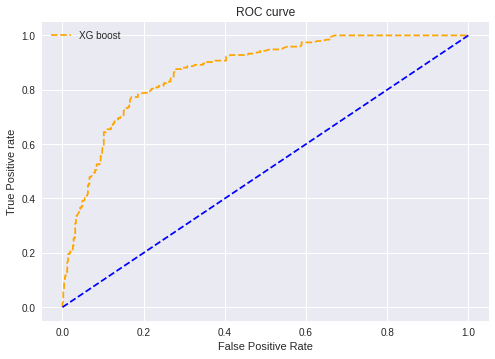

In [ ]:
from sklearn.metrics import roc_curve
model.fit(x_train_ns,y_train_ns)
pred_prob1 = model.predict_proba(x_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XG boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# **Saving the model** 

In [ ]:
import pickle

filename = '/content/drive/MyDrive/datatrained/Telecom_customer_churn/model.sav'
pickle.dump(model, open(filename, 'wb'))

# **Conclusion**

In [ ]:

filename = '/content/drive/MyDrive/datatrained/Telecom_customer_churn/model.sav'
model = pickle.load(open(filename, 'rb'))

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, x_ns, y_ns, cv=10)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_ns,y_pred))
print(accuracy_score(y_ns,y_pred))
print(classification_report(y_ns,y_pred))

[[4093  708]
 [ 760 3264]]
0.8336543909348442
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      4801
         1.0       0.82      0.81      0.82      4024

    accuracy                           0.83      8825
   macro avg       0.83      0.83      0.83      8825
weighted avg       0.83      0.83      0.83      8825



In [ ]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y_ns)],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8785,8786,8787,8788,8789,8790,8791,8792,8793,8794,8795,8796,8797,8798,8799,8800,8801,8802,8803,8804,8805,8806,8807,8808,8809,8810,8811,8812,8813,8814,8815,8816,8817,8818,8819,8820,8821,8822,8823,8824
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
